In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import matplotlib.pyplot as plt

In [3]:
healthy_features_path = 'featuresvalues.csv'
tumor_features_path = 'tumorfeatures.csv'

In [4]:
data = pd.read_csv(healthy_features_path)
data_clean = data.dropna()
data_clean

,1,2,3,4,5,6,7,8,4.1,Unnamed: 9,...,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107
0,0.312711,0,0,96.625630,85.937500,30.937500,90.336624,90.336624,1429.723612,30.215894,...,0.021158,4.950082,0.140360,1755.084130,2.492708,0.004271,23.053272,0.013157,0.220057,0
1,0.702091,0,0,79.821001,61.992188,65.585938,78.452682,78.452682,2318.384043,56.041604,...,0.014458,5.678697,0.136410,559.907954,2.690750,0.003352,34.023626,0.019771,0.225209,0
2,0.691442,0,0,67.548490,64.414062,51.796875,70.155304,70.155304,2198.023097,46.705885,...,0.020683,7.113756,0.159100,1641.650580,0.073083,0.004445,1006.778331,0.121947,20.989892,0
3,0.207779,0,0,156.088068,78.164062,35.937500,132.375551,132.375551,1908.062490,32.431834,...,0.027838,5.966807,0.337106,22.895755,1.662553,0.006002,83.262073,0.079386,0.502555,0
4,0.282777,0,0,100.612953,52.338000,41.184000,95.669886,95.669886,1488.830343,28.451027,...,0.025614,5.595331,0.160192,811.998073,1.168050,0.005002,42.698793,0.015685,0.535532,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.193854,0,0,162.396489,70.312500,26.367188,141.827003,141.827003,2212.206523,31.481219,...,0.027410,5.661709,0.243142,131.112058,2.948380,0.003997,73.166907,0.056923,0.501311,0
76,0.335641,0,0,100.225046,54.687500,48.828125,88.307389,88.307389,1618.226369,33.639606,...,0.012035,6.291807,0.299544,35.919704,0.329676,0.007996,423.064167,0.035987,4.055273,0
77,0.532818,0,0,54.400939,34.179688,41.015625,51.563980,51.563980,652.949015,28.985823,...,0.024009,5.611265,0.248266,48.664024,0.268894,0.027179,92.863090,0.062765,3.732317,0
78,0.184894,0,0,172.443819,122.812500,29.062500,133.721156,133.721156,1576.831055,31.883750,...,0.030018,5.640576,0.406452,9.481230,1.729093,0.004740,185.259795,0.068346,0.938922,0


In [5]:
X_healthy = data_clean.iloc[:, :-1]

In [6]:
X_healthy.values.shape

(80, 107)

In [7]:
X_healthy.values.dtype

dtype('float64')

In [8]:
y_healthy = data_clean.iloc[:, -1]

In [9]:
y_healthy.values.shape

(80,)

In [10]:
# Check for rows with NaN values
nan_rows = data[data.isnull().any(axis=1)]

# Print rows with NaN values
print("Rows with NaN values:")
print(nan_rows)

Rows with NaN values:
Empty DataFrame
Columns: [1, 2, 3, 4, 5, 6, 7, 8, 4.1, Unnamed: 9, 8.1, Unnamed: 11, Unnamed: 12, Unnamed: 13, Unnamed: 14, Unnamed: 15, Unnamed: 16, Unnamed: 17, Unnamed: 18, Unnamed: 19, Unnamed: 20, Unnamed: 21, Unnamed: 22, Unnamed: 23, Unnamed: 24, Unnamed: 25, Unnamed: 26, Unnamed: 27, Unnamed: 28, Unnamed: 29, Unnamed: 30, Unnamed: 31, Unnamed: 32, Unnamed: 33, Unnamed: 34, Unnamed: 35, Unnamed: 36, Unnamed: 37, Unnamed: 38, Unnamed: 39, Unnamed: 40, Unnamed: 41, Unnamed: 42, Unnamed: 43, Unnamed: 44, Unnamed: 45, Unnamed: 46, Unnamed: 47, Unnamed: 48, Unnamed: 49, Unnamed: 50, Unnamed: 51, Unnamed: 52, Unnamed: 53, Unnamed: 54, Unnamed: 55, Unnamed: 56, Unnamed: 57, Unnamed: 58, Unnamed: 59, Unnamed: 60, Unnamed: 61, Unnamed: 62, Unnamed: 63, Unnamed: 64, Unnamed: 65, Unnamed: 66, Unnamed: 67, Unnamed: 68, Unnamed: 69, Unnamed: 70, Unnamed: 71, Unnamed: 72, Unnamed: 73, Unnamed: 74, Unnamed: 75, Unnamed: 76, Unnamed: 77, Unnamed: 78, Unnamed: 79, Unnamed: 

In [11]:
nan_rows

,1,2,3,4,5,6,7,8,4.1,Unnamed: 9,...,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107


In [12]:
# Define an empty list to store row values
row_values_list = []

# Iterate over the DataFrame to append values of each row into the list
for index, row in nan_rows.iterrows():
    row_values_list.append(row.tolist())

# Print the list of row values
print("List of row values:")
print(row_values_list)

List of row values:
[]


In [13]:
existing_array = np.array([[1, 2, 3],
                           [4, 5, 6]])

# New row to add
new_row = np.array([7, 8, 9])

# Adding a new row using np.vstack()
modified_array = np.vstack((existing_array, new_row))
print(modified_array)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [14]:
data_tumor = pd.read_csv(tumor_features_path)
data_tumor_clean = data_tumor.dropna()
data_tumor


,1,2,3,4,5,6,7,8,9,10,...,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107
0,0.319353,0,0,125.477002,44.687500,117.734375,135.064117,135.064117,2673.338826,40.071452,...,0.015076,5.958638,0.112009,2523.268838,2.473413,0.003323,29.072921,0.014504,0.227486,1
1,0.268981,0,0,171.110519,51.562500,126.328125,189.462468,189.462468,3624.559530,46.025407,...,0.001082,5.979361,0.300394,63.402622,0.312355,0.002028,456.073789,0.023048,3.711866,1
2,0.316529,0,0,124.029475,42.109375,71.328125,115.872307,115.872307,2473.136902,39.258905,...,0.015853,6.106666,0.306395,35.450356,1.605275,0.004038,93.577571,0.059002,0.409372,1
3,0.372188,0,0,168.512073,52.421875,124.609375,153.086989,153.086989,3805.990601,62.718251,...,0.005313,6.274624,0.269012,71.571276,0.767073,0.002570,351.204857,0.012382,1.786180,1
4,0.393667,0,0,134.186998,48.125000,128.046875,141.942633,141.942633,2849.723307,52.824930,...,0.010695,5.609935,0.432405,7.162694,2.307508,0.002424,135.190550,0.061111,0.243941,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,0.238967,0,0,267.300895,110.000000,148.671875,171.713792,171.713792,1465.234375,63.876119,...,0.031078,5.278934,0.121083,2009.603599,1.863040,0.004049,33.004101,0.011812,0.485635,1
277,0.723967,0,0,53.692039,42.109375,55.000000,55.428022,55.428022,884.384155,38.871242,...,0.025740,5.475583,0.180159,136.511751,1.660235,0.007308,25.795424,0.028896,0.328948,1
278,0.311220,0,0,170.212424,48.984375,108.281250,182.806657,182.806657,2727.128092,52.973452,...,0.025742,5.224807,0.119204,3490.677242,4.764778,0.002315,21.245111,0.012816,0.121341,1
279,0.273835,0,0,128.562779,34.375000,71.328125,121.549169,121.549169,1934.013367,35.204960,...,0.005154,6.180942,0.143015,850.538600,0.155308,0.004182,368.726573,0.013234,10.172534,1


In [15]:
X_tumor = data_tumor_clean.iloc[:, :-1]
y_tumor = data_tumor_clean.iloc[:, -1]

In [16]:
# Check for rows with NaN values
nan_rows = data_tumor[data_tumor.isnull().any(axis=1)]

# Print rows with NaN values
print("Rows with NaN values:")
print(nan_rows)

Rows with NaN values:
Empty DataFrame
Columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, Unnamed: 10, Unnamed: 11, Unnamed: 12, Unnamed: 13, Unnamed: 14, Unnamed: 15, Unnamed: 16, Unnamed: 17, Unnamed: 18, Unnamed: 19, Unnamed: 20, Unnamed: 21, Unnamed: 22, Unnamed: 23, Unnamed: 24, Unnamed: 25, Unnamed: 26, Unnamed: 27, Unnamed: 28, Unnamed: 29, Unnamed: 30, Unnamed: 31, Unnamed: 32, Unnamed: 33, Unnamed: 34, Unnamed: 35, Unnamed: 36, Unnamed: 37, Unnamed: 38, Unnamed: 39, Unnamed: 40, Unnamed: 41, Unnamed: 42, Unnamed: 43, Unnamed: 44, Unnamed: 45, Unnamed: 46, Unnamed: 47, Unnamed: 48, Unnamed: 49, Unnamed: 50, Unnamed: 51, Unnamed: 52, Unnamed: 53, Unnamed: 54, Unnamed: 55, Unnamed: 56, Unnamed: 57, Unnamed: 58, Unnamed: 59, Unnamed: 60, Unnamed: 61, Unnamed: 62, Unnamed: 63, Unnamed: 64, Unnamed: 65, Unnamed: 66, Unnamed: 67, Unnamed: 68, Unnamed: 69, Unnamed: 70, Unnamed: 71, Unnamed: 72, Unnamed: 73, Unnamed: 74, Unnamed: 75, Unnamed: 76, Unnamed: 77, Unnamed: 78, Unnamed: 79, Unnamed: 80

In [17]:
z=y_tumor.values.reshape(281,1)
z.shape

(281, 1)

In [18]:
h = y_healthy.values.reshape(80,1)


In [19]:
modified_array = np.vstack((z, h))
y = modified_array.reshape(1,361)
print(y)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]]


In [20]:
z1=X_tumor.values.reshape(281,107)
h1 = X_healthy.values.reshape(80,107)
modified_array = np.vstack((z1, h1))
X = modified_array.reshape(107,361)
print(X)

[[ 3.19352960e-01  0.00000000e+00  0.00000000e+00 ...  8.03799466e-01
   1.15677630e+00  1.94830767e+00]
 [ 1.40132850e+00  5.87909771e-01  5.48909034e-01 ...  2.43103113e-02
   4.32686259e+00  1.43741988e+03]
 [ 4.88279424e-01  6.36809950e-01  1.10297777e+00 ...  1.61092895e-01
   5.96007379e+03  2.13052085e+00]
 ...
 [ 3.71331023e+02  3.21777316e-01  5.89020182e-01 ... -1.56000000e+02
   3.12000000e+02  2.41249031e+01]
 [ 7.42834603e+01 -1.05425063e+00  1.09174798e+07 ...  1.26571925e+03
   1.77893289e-01  1.62035640e-02]
 [ 2.61464344e-01  3.95397679e+01  4.92180800e-03 ...  1.17422719e+03
   8.33567720e-02  1.50202582e+01]]


In [21]:
print(X.shape)
X =X.reshape(361,107)
print(y.shape)
y = y.reshape(361,1)

(107, 361)
(1, 361)


In [65]:
X[:,106]

array([2.27485932e-01, 3.71186617e+00, 4.09371981e-01, 1.78617992e+00,
       2.43941079e-01, 1.52145484e-01, 1.02113650e+01, 2.79512555e-01,
       7.80697598e-01, 2.86348951e-01, 3.06085934e-01, 2.68229824e-01,
       6.87065711e+00, 3.57418345e+01, 2.54794096e+01, 2.79645533e-01,
       5.05088101e-01, 2.36013059e-01, 1.72992757e-01, 2.58451493e+01,
       1.03911005e+00, 5.80695463e+00, 3.14386827e-01, 5.84248416e-01,
       1.98037487e-01, 1.74206563e-01, 1.46004787e+01, 3.53578304e-01,
       1.91979379e-01, 3.13365392e+00, 2.65882711e-01, 8.52964458e-01,
       3.58428687e-01, 3.26595297e-01, 4.20677677e-01, 2.29331235e-01,
       4.55782739e-01, 4.57466074e-01, 2.85013495e-01, 3.18062368e-01,
       7.52759996e-01, 5.86315354e-01, 3.16578574e-01, 3.13060427e-01,
       5.91211834e-01, 1.71051907e-01, 5.50310788e+00, 3.24146598e-01,
       2.31627857e+00, 1.66756178e-01, 4.23177400e+01, 1.83526239e-01,
       2.58823036e-01, 2.47741873e-01, 1.26437715e-01, 1.51812269e-01,
      

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
X.shape

(361, 107)

In [131]:
X_train[85]

array([ 3.21800605e-01,  0.00000000e+00,  0.00000000e+00,  1.41648798e+02,
        4.12500000e+01,  6.70312500e+01,  1.24609375e+02,  1.24609375e+02,
        2.22831573e+03,  4.55826690e+01,  1.70751660e-01,  4.83174130e+03,
        2.16833783e+00,  2.30789185e+03,  2.10000000e+01,  1.24000000e+02,
        2.41136530e+07,  2.68416678e+00,  5.60000000e+01,  2.62375319e+00,
        1.87000000e+02,  3.22862340e+01,  7.85059200e+01,  8.40000000e+01,
       -6.80000000e+01,  2.55000000e+02,  2.36637479e+01,  8.78428652e+01,
       -3.53242480e-01,  1.78085450e+07,  1.78891059e-01,  1.55318949e+03,
        4.62738319e+01,  1.89139658e+02, -1.05707991e+01,  8.54330955e+00,
        1.40635467e+00,  7.17141875e-01,  8.59171444e-01,  1.62719677e+00,
        6.56003831e-01,  6.47677932e-01,  6.23903071e-01,  9.88835877e-01,
        9.31742877e-01, -2.03866433e-01,  8.03906221e-01,  5.03379428e-01,
        6.67004849e+00,  5.07310840e-02,  4.76670761e+00,  7.35787255e-01,
        1.04518936e-01,  

In [132]:
y_train

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [133]:
# y=y.reshape((361,1))
y.shape

(361, 1)

In [134]:
# y_test
count = np.sum(y_test == 1)
count


57

In [89]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [90]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
steps = list()
steps.append(('scaler',MinMaxScaler()))
steps.append(('model',rf_classifier))
pipeline = Pipeline(steps=steps)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train) #computes the mean and std
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score


In [35]:
y_pred_probs = rf_classifier.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
# print(len(y_pred))
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)
f1 = f1_score(y_test, y_pred)

# Calculate sensitivity (recall) and specificity
tn, fp, fn, tp = confusion_mat.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

metrics_dict = {
    'Accuracy': accuracy,
    'Sensitivity (Recall)': sensitivity,
    'Specificity': specificity,
    'Confusion Matrix': confusion_mat,
    'Classification Report': classification_rep,
    'ROC AUC': roc_auc,
    'F1 Score': f1
}

In [36]:
tn

14

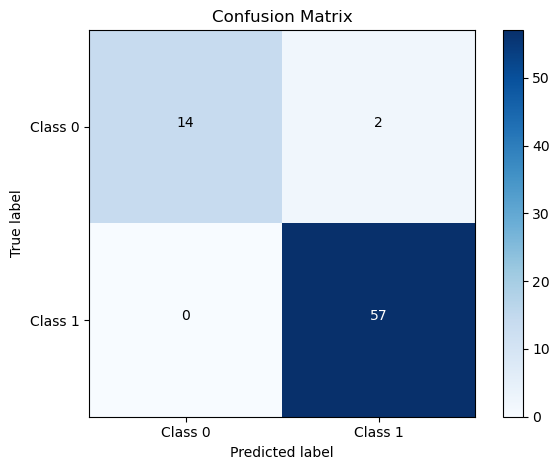

In [37]:
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add label annotations
classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = confusion_mat.max() / 2.
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        plt.text(j, i, format(confusion_mat[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_mat[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [38]:
metrics_dict

{'Accuracy': 0.9726027397260274,
 'Sensitivity (Recall)': 1.0,
 'Specificity': 0.875,
 'Confusion Matrix': array([[14,  2],
        [ 0, 57]]),
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       1.00      0.88      0.93        16\n           1       0.97      1.00      0.98        57\n\n    accuracy                           0.97        73\n   macro avg       0.98      0.94      0.96        73\nweighted avg       0.97      0.97      0.97        73\n',
 'ROC AUC': 0.9375,
 'F1 Score': 0.9827586206896551}

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train) #computes the mean and std
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.01, random_state=42)

steps = list()
steps.append(('scaler',MinMaxScaler()))
steps.append(('model',xgb_classifier))
pipeline = Pipeline(steps=steps)

In [40]:
#XGboost
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.01, random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [41]:
y_pred_probs = xgb_classifier.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)
f1 = f1_score(y_test, y_pred)

# Calculate sensitivity (recall) and specificity
tn, fp, fn, tp = confusion_mat.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

metrics_dict = {
    'Accuracy': accuracy,
    'Sensitivity (Recall)': sensitivity,
    'Specificity': specificity,
    'Confusion Matrix': confusion_mat,
    'Classification Report': classification_rep,
    'ROC AUC': roc_auc,
    'F1 Score': f1
}

In [42]:
metrics_dict

{'Accuracy': 0.9863013698630136,
 'Sensitivity (Recall)': 1.0,
 'Specificity': 0.9375,
 'Confusion Matrix': array([[15,  1],
        [ 0, 57]]),
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       1.00      0.94      0.97        16\n           1       0.98      1.00      0.99        57\n\n    accuracy                           0.99        73\n   macro avg       0.99      0.97      0.98        73\nweighted avg       0.99      0.99      0.99        73\n',
 'ROC AUC': 0.96875,
 'F1 Score': 0.9913043478260869}

In [69]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [91]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(pipeline, X, y, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column

Cross-validation scores: [0.97260274 0.94444444 0.90277778 0.88888889 0.95833333]
Mean accuracy: 0.9334094368340944


In [146]:
precision_scores = cross_val_score(rf_classifier, X, y, cv=kfold, scoring='precision')

# Calculate average precision
average_precision = np.mean(precision_scores)
print("Average Precision:", average_precision)

/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column

Average Precision: 0.9306363304408738


In [147]:
roc_auc_scores = cross_val_score(rf_classifier, X, y, cv=kfold, scoring='roc_auc')

# Calculate average precision
average_roc_auc = np.mean(roc_auc_scores)
print("Average ROC AUC:", average_roc_auc)

/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column

Average ROC AUC: 0.9926494380240725


In [149]:
recall_scores = cross_val_score(rf_classifier, X, y, cv=kfold, scoring='recall')

# Calculate average precision
average_recall = np.mean(recall_scores)
print("Average Recall:", average_recall)

/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column

Average Recall: 0.9894110275689222


In [150]:
f1_scores = cross_val_score(rf_classifier, X, y, cv=kfold, scoring='f1')

# Calculate average precision
average_f1 = np.mean(f1_scores)
print("Average F-1 Score:", average_f1)

/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column

Average F-1 Score: 0.9588923303915807


In [151]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(xgb_classifier, X, y, cv=kfold,scoring = 'precision')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean precision:", np.mean(scores))

Cross-validation scores: [0.98275862 0.93103448 0.94915254 0.93442623 0.96491228]
Mean precision: 0.9524568312062216


In [152]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(xgb_classifier, X, y, cv=kfold,scoring = 'roc_auc')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean ROC AUC:", np.mean(scores))

Cross-validation scores: [1.         0.96193416 0.98772321 0.99883041 0.99181287]
Mean ROC AUC: 0.9880601291036234


In [93]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(pipeline, X, y, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross-validation scores: [0.98630137 0.94444444 0.95833333 0.94444444 0.94444444]
Mean accuracy: 0.955593607305936


In [94]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(pipeline, X, y, cv=kfold,scoring = "recall")

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean recall:", np.mean(scores))

Cross-validation scores: [1.         1.         1.         1.         0.96491228]
Mean recall: 0.9929824561403509


In [155]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(xgb_classifier, X, y, cv=kfold,scoring = "f1")

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean f1:", np.mean(scores))

Cross-validation scores: [0.99130435 0.96428571 0.97391304 0.96610169 0.96491228]
Mean f1: 0.9721034162414142


In [22]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train) #computes the mean and std
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
svc_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
svc_classifier.fit(X_train, y_train)

/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [75]:
y_pred_probs = svc_classifier.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)
f1 = f1_score(y_test, y_pred)

# Calculate sensitivity (recall) and specificity
tp, fn, fp, tn = confusion_mat.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

metrics_dict = {
    'Accuracy': accuracy,
    'Sensitivity (Recall)': sensitivity,
    'Specificity': specificity,
    'Confusion Matrix': confusion_mat,
    'Classification Report': classification_rep,
    'ROC AUC': roc_auc,
    'F1 Score': f1
}

In [76]:
metrics_dict

{'Accuracy': 0.9452054794520548,
 'Sensitivity (Recall)': 0.75,
 'Specificity': 1.0,
 'Confusion Matrix': array([[12,  4],
        [ 0, 57]]),
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       1.00      0.75      0.86        16\n           1       0.93      1.00      0.97        57\n\n    accuracy                           0.95        73\n   macro avg       0.97      0.88      0.91        73\nweighted avg       0.95      0.95      0.94        73\n',
 'ROC AUC': 0.875,
 'F1 Score': 0.9661016949152543}

In [77]:
from sklearn.pipeline import Pipeline

In [84]:
svc_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

steps = list()
steps.append(("scaler",MinMaxScaler()))
steps.append(("model",svc_classifier))
pipeline = Pipeline(steps=steps)

In [85]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
print(type(X))
# Perform k-fold cross-validation and compute scores
scores = cross_val_score(pipeline, X, y, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

<class 'numpy.ndarray'>
Cross-validation scores: [0.94520548 0.97222222 0.91666667 0.90277778 0.93055556]
Mean accuracy: 0.9334855403348554


/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A 

In [86]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(pipeline, X, y, cv=kfold, scoring = "precision")

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean precision:", np.mean(scores))

Cross-validation scores: [0.93442623 0.96428571 0.90322581 0.890625   0.91935484]
Mean precision: 0.9223835177910402


/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A 

In [163]:
y.shape
y=y.reshape((361,))

In [88]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(pipeline, X, y, cv=kfold, scoring = "roc_auc")

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean ROC AUC:", np.mean(scores))

Cross-validation scores: [0.99890351 0.98148148 0.98214286 0.95204678 0.98479532]
Mean ROC AUC: 0.9798739905318854


/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A 

In [87]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(pipeline, X, y, cv=kfold, scoring = "recall")

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean Recall:", np.mean(scores))

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean Recall: 1.0


/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A 

In [166]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(svc_classifier, X, y, cv=kfold, scoring = "f1")

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean F1:", np.mean(scores))

Cross-validation scores: [0.88372093 0.89256198 0.88888889 0.9047619  0.91935484]
Mean F1: 0.8978577092128207


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train) #computes the mean and std
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)

# Train the classifier
knn.fit(X_train, y_train)

/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [45]:
y_pred_probs = knn.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)
f1 = f1_score(y_test, y_pred)

# Calculate sensitivity (recall) and specificity
tn, fp, fn, tp = confusion_mat.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

metrics_dict = {
    'Accuracy': accuracy,
    'Sensitivity (Recall)': sensitivity,
    'Specificity': specificity,
    'Confusion Matrix': confusion_mat,
    'Classification Report': classification_rep,
    'ROC AUC': roc_auc,
    'F1 Score': f1
}

In [46]:
metrics_dict

{'Accuracy': 0.9041095890410958,
 'Sensitivity (Recall)': 0.9298245614035088,
 'Specificity': 0.8125,
 'Confusion Matrix': array([[13,  3],
        [ 4, 53]]),
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.76      0.81      0.79        16\n           1       0.95      0.93      0.94        57\n\n    accuracy                           0.90        73\n   macro avg       0.86      0.87      0.86        73\nweighted avg       0.91      0.90      0.91        73\n',
 'ROC AUC': 0.8711622807017544,
 'F1 Score': 0.9380530973451328}

In [210]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(knn, X, y, cv=kfold,scoring = 'precision')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean precision:", np.mean(scores))

Cross-validation scores: [0.94827586 0.98148148 0.85245902 0.89285714 0.93103448]
Mean precision: 0.9212215971119306


In [211]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(knn, X, y, cv=kfold,scoring = 'roc_auc')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean ROC AUC:", np.mean(scores))

Cross-validation scores: [0.89967105 0.9686214  0.69196429 0.75497076 0.85789474]
Mean ROC AUC: 0.8346244469197686


In [212]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(knn, X, y, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross-validation scores: [0.93150685 0.97222222 0.81944444 0.81944444 0.90277778]
Mean accuracy: 0.8890791476407914


In [213]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(knn, X, y, cv=kfold,scoring = "recall")

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean recall:", np.mean(scores))

Cross-validation scores: [0.96491228 0.98148148 0.92857143 0.87719298 0.94736842]
Mean recall: 0.9399053188526872


In [214]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(knn, X, y, cv=kfold,scoring = "f1")

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean f1:", np.mean(scores))

Cross-validation scores: [0.95652174 0.98148148 0.88888889 0.88495575 0.93913043]
Mean f1: 0.9301956592991607


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train) #computes the mean and std
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the classifier
naive_bayes.fit(X_train, y_train)


/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [49]:
y_pred_probs = naive_bayes.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)
f1 = f1_score(y_test, y_pred)

# Calculate sensitivity (recall) and specificity
tn, fp, fn, tp = confusion_mat.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

metrics_dict = {
    'Accuracy': accuracy,
    'Sensitivity (Recall)': sensitivity,
    'Specificity': specificity,
    'Confusion Matrix': confusion_mat,
    'Classification Report': classification_rep,
    'ROC AUC': roc_auc,
    'F1 Score': f1
}

In [50]:
metrics_dict

{'Accuracy': 0.9178082191780822,
 'Sensitivity (Recall)': 0.9824561403508771,
 'Specificity': 0.6875,
 'Confusion Matrix': array([[11,  5],
        [ 1, 56]]),
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.92      0.69      0.79        16\n           1       0.92      0.98      0.95        57\n\n    accuracy                           0.92        73\n   macro avg       0.92      0.83      0.87        73\nweighted avg       0.92      0.92      0.91        73\n',
 'ROC AUC': 0.8349780701754386,
 'F1 Score': 0.9491525423728813}

In [218]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(naive_bayes, X, y, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross-validation scores: [0.79452055 0.83333333 0.80555556 0.80555556 0.84722222]
Mean accuracy: 0.8172374429223744


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train) #computes the mean and std
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
from sklearn.ensemble import AdaBoostClassifier
# Initialize the AdaBoost classifier with DecisionTreeClassifier as the base estimator
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier
adaboost.fit(X_train, y_train)

/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=42)

In [53]:
y_pred_probs = adaboost.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)
f1 = f1_score(y_test, y_pred)

# Calculate sensitivity (recall) and specificity
tn, fp, fn, tp = confusion_mat.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

metrics_dict = {
    'Accuracy': accuracy,
    'Sensitivity (Recall)': sensitivity,
    'Specificity': specificity,
    'Confusion Matrix': confusion_mat,
    'Classification Report': classification_rep,
    'ROC AUC': roc_auc,
    'F1 Score': f1
}

In [54]:
metrics_dict

{'Accuracy': 1.0,
 'Sensitivity (Recall)': 1.0,
 'Specificity': 1.0,
 'Confusion Matrix': array([[16,  0],
        [ 0, 57]]),
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        16\n           1       1.00      1.00      1.00        57\n\n    accuracy                           1.00        73\n   macro avg       1.00      1.00      1.00        73\nweighted avg       1.00      1.00      1.00        73\n',
 'ROC AUC': 1.0,
 'F1 Score': 1.0}

In [224]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(adaboost, X, y, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross-validation scores: [1.         0.97222222 0.95833333 0.90277778 0.97222222]
Mean accuracy: 0.961111111111111


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train) #computes the mean and std
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion = "gini",random_state=42)

# Train the classifier
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
y_pred_probs = decision_tree.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)
f1 = f1_score(y_test, y_pred)

# Calculate sensitivity (recall) and specificity
tn, fp, fn, tp = confusion_mat.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

metrics_dict = {
    'Accuracy': accuracy,
    'Sensitivity (Recall)': sensitivity,
    'Specificity': specificity,
    'Confusion Matrix': confusion_mat,
    'Classification Report': classification_rep,
    'ROC AUC': roc_auc,
    'F1 Score': f1
}

In [58]:
metrics_dict

{'Accuracy': 0.9863013698630136,
 'Sensitivity (Recall)': 0.9824561403508771,
 'Specificity': 1.0,
 'Confusion Matrix': array([[16,  0],
        [ 1, 56]]),
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97        16\n           1       1.00      0.98      0.99        57\n\n    accuracy                           0.99        73\n   macro avg       0.97      0.99      0.98        73\nweighted avg       0.99      0.99      0.99        73\n',
 'ROC AUC': 0.9912280701754386,
 'F1 Score': 0.9911504424778761}

In [244]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(decision_tree, X, y, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross-validation scores: [0.98630137 0.95833333 0.97222222 0.93055556 0.97222222]
Mean accuracy: 0.9639269406392694


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train) #computes the mean and std
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
logistic_regression = LogisticRegression()

# Train the classifier
logistic_regression.fit(X_train, y_train)

/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [61]:
y_pred_probs = logistic_regression.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)
f1 = f1_score(y_test, y_pred)

# Calculate sensitivity (recall) and specificity
tn, fp, fn, tp = confusion_mat.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

metrics_dict = {
    'Accuracy': accuracy,
    'Sensitivity (Recall)': sensitivity,
    'Specificity': specificity,
    'Confusion Matrix': confusion_mat,
    'Classification Report': classification_rep,
    'ROC AUC': roc_auc,
    'F1 Score': f1
}

In [62]:
metrics_dict

{'Accuracy': 0.958904109589041,
 'Sensitivity (Recall)': 1.0,
 'Specificity': 0.8125,
 'Confusion Matrix': array([[13,  3],
        [ 0, 57]]),
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       1.00      0.81      0.90        16\n           1       0.95      1.00      0.97        57\n\n    accuracy                           0.96        73\n   macro avg       0.97      0.91      0.94        73\nweighted avg       0.96      0.96      0.96        73\n',
 'ROC AUC': 0.90625,
 'F1 Score': 0.9743589743589743}

In [95]:
logistic_regression = LogisticRegression()
steps = list()
steps.append(('scaler',MinMaxScaler()))
steps.append(('model',logistic_regression))
pipeline = Pipeline(steps=steps)

In [96]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute scores
scores = cross_val_score(pipeline, X, y, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross-validation scores: [0.95890411 0.98611111 0.95833333 0.90277778 0.94444444]
Mean accuracy: 0.9501141552511415


/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A 